# API 1: Indexing

cuda
checkpoint directory created: ./model
saving model version 0.0


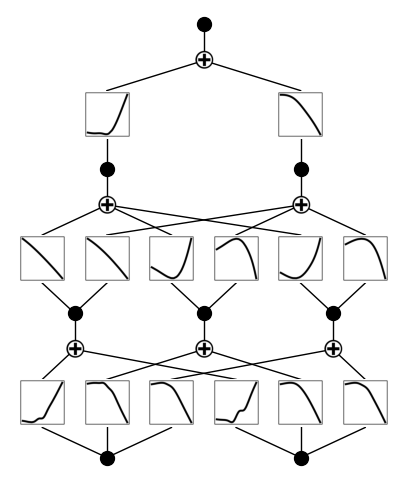

In [1]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = KAN(width=[2,3,2,1], noise_scale=0.3, device=device)
x = torch.normal(0,1,size=(100,2)).to(device)
model(x);
beta = 100
model.plot(beta=beta)
# [2,3,2,1] means 2 input nodes
# 3 neurons in the first hidden layer,
# 2 neurons in the second hidden layer,
# 1 output node

### Indexing of edges (activation functions)

Each activation function is indexed by $(l,i,j)$ where $l$ is the layer index, $i$ is the input neuron index, $j$ is the output neuron index. All of them starts from 0. For example, the one in the bottom left corner is (0, 0, 0). Let's try to make it symbolic and see it turns red.

r2 is 0.9785453677177429
saving model version 0.1
saving model version 0.2


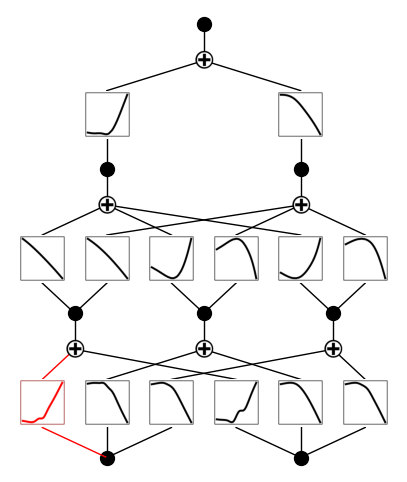

In [2]:
model.fix_symbolic(0,0,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,0,0)

r2 is 0.991183876991272
saving model version 0.3
saving model version 0.4


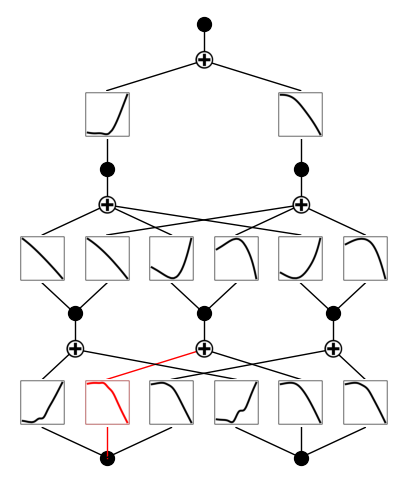

In [3]:
model.fix_symbolic(0,0,1,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,0,1)

r2 is 0.9494338631629944
saving model version 0.5
saving model version 0.6


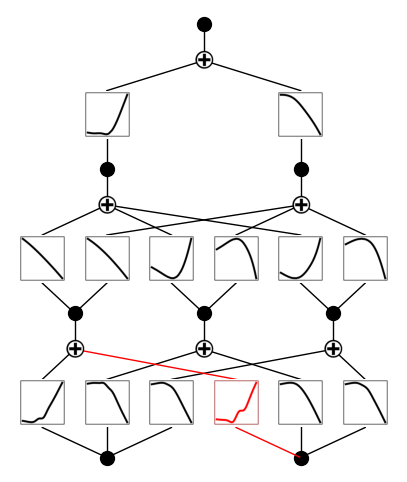

In [4]:
model.fix_symbolic(0,1,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,1,0)

r2 is 0.9999909996986389
saving model version 0.7
saving model version 0.8


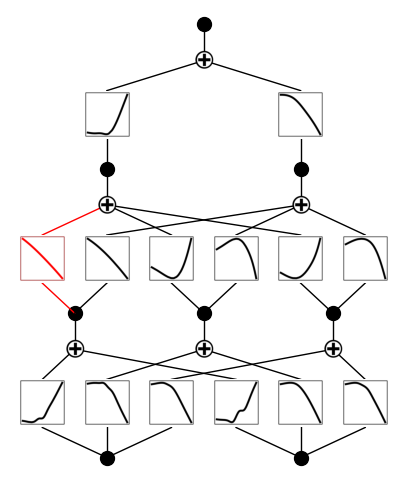

In [5]:
model.fix_symbolic(1,0,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(1,0,0)

r2 is 0.9998168349266052
saving model version 0.9
saving model version 0.10


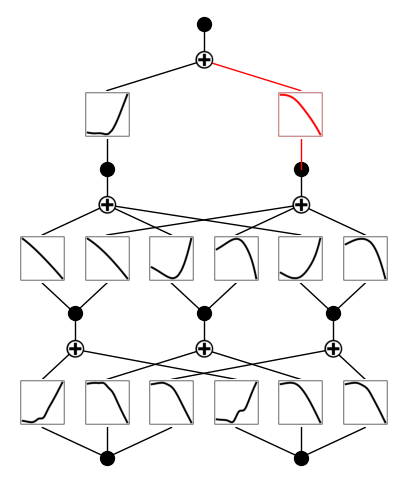

In [6]:
model.fix_symbolic(2,1,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(2,1,0)

### Indexing of nodes (neurons)

Each neuron (node) is indexed by $(l,i)$ where $l$ is the layer index along depth, $i$ is the neuron index along width. In the function remove_node, we use use $(l,i)$ to indicate which node we want to remove.

In [7]:
model.remove_node(1,0)

saving model version 0.11
saving model version 0.12
saving model version 0.13


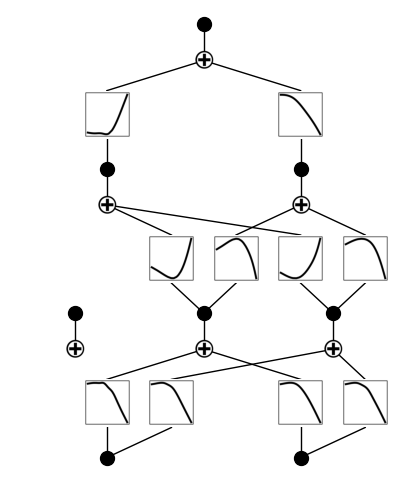

In [8]:
model.plot(beta=beta)

In [9]:
model.remove_node(2,1)

saving model version 0.14
saving model version 0.15
saving model version 0.16


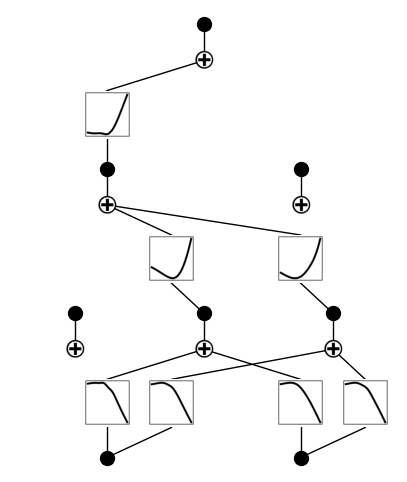

In [10]:
model.plot(beta=beta)

In [11]:
model.remove_node(1,2)

saving model version 0.17
saving model version 0.18
saving model version 0.19


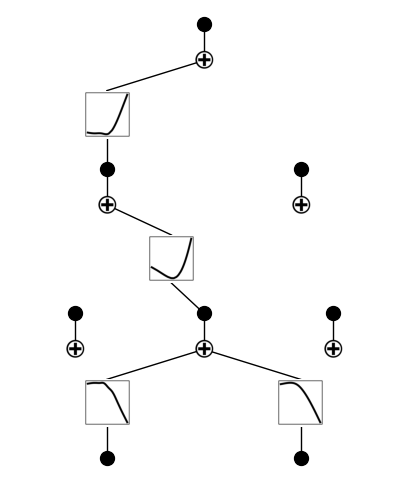

In [12]:
model.plot(beta=beta)

### Indexing of layers

In [13]:
# KAN spline layers are refererred to as act_fun
# KAN symbolic layers are referred to as symbolic_fun

model = KAN(width=[2,3,5,1])

i = 0
model.act_fun[i] # => KAN Layer (Spline)
model.symbolic_fun[i] # => KAN Layer (Symbolic)

for i in range(3):
    print(model.act_fun[i].in_dim, model.act_fun[i].out_dim)
    print(model.symbolic_fun[i].in_dim, model.symbolic_fun[i].out_dim)

checkpoint directory created: ./model
saving model version 0.0
2 3
2 3
3 5
3 5
5 1
5 1


In [14]:
# check model parameters
model.act_fun[i].grid
model.act_fun[i].coef
model.symbolic_fun[i].funs_name
model.symbolic_fun[i].mask

Parameter containing:
tensor([[0., 0., 0., 0., 0.]])